In [2]:
import ee
from ee import batch

ee.Initialize()
import geemap
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import savetxt
import pandas as pd
from numpy.random import randn
from numpy.random import seed
from scipy.stats import spearmanr

In [ ]:
user_id = geemap.ee_user_id()
print(user_id)

In [3]:
s2 = ee.ImageCollection("COPERNICUS/S2"),
s1 = ee.ImageCollection("COPERNICUS/S1_GRD"),
srtm = ee.Image("USGS/SRTMGL1_003")
luse = ee.FeatureCollection("users/verdemuskuna/cc/LA_PAZ_landuse")
m2016 = ee.FeatureCollection("users/verdemuskuna/cc/Field_plots_measured_2016")
lp = ee.Image('users/verdemuskuna/cc/lapaz_2017_v1')
#s2_ind = require("users/verdemuskuna/modules:s2_ind") 
#s1_load = require("users/verdemuskuna/modules:s1_load")

print(lp.bandNames().getInfo())
def c_buffer (fc):
    return fc.buffer(12.62)

circ = m2016.map(c_buffer)
bbands = lp.bandNames().getInfo()

def myproperties(feature):
  feature=ee.Feature(feature).setGeometry(None)
  return feature

['VV', 'angle', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60', 'S2_gndvi', 'S2_ndvi', 'S2_ndre1', 'S2_nrer1', 'S2_nreg1', 'S2_grvi', 'S2_evi', 'S2_evi2', 'S2_savi', 'S2_osavi', 'S2_rvi', 'S2_bsi', 'S2_dvi', 'S2_satvi', 'S2_msavi2', 'S2_ndi45', 'S2_lai', 'S2_ireci']


In [4]:
Map = geemap.Map(center=[6.08408,-68.14201], zoom=14)

Map.add_basemap("SATELLITE")

Landcover_vispar = {'bands':['lc_dep'],"opacity":1,"min":0,"max":5,"palette":["FFEE88","55AA22","DDCC66","BB0011","5566AA","882255"]}
Map.addLayer(lp,{'bands':['B4','B3','B2'],"min":0.05,"max":0.13},'S2')
Map.addLayer(circ,'', 'Plots')

Map

Map(center=[6.08408, -68.14201], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleBut…

In [31]:
ssamples = lp.reduceRegions(reducer='mean',
                            collection=circ,
                            scale=10,
                            tileScale=2)

ssamples = ssamples.map(myproperties).toList(ssamples.size())

b_f = bbands + ['Age'] + ['DBH__cm_'] + ['HT__m_'] + ['BA__m2_'] + ['VT__m3_']# + ['Year___Plo']

#ee.batch.Export.table.toDrive(collection=ssamples,
#                              description='la_paz_v1').start()

#vat = np.array((ee.Array(ssamples.get(bbands[3])).getInfo()))
def tar(el):
    return ee.Feature(el).toArray(b_f)


tableList = ssamples.map(tar)

matA = ee.Array.cat(tableList, 1)

dsr = np.array(matA.getInfo()).transpose()

# print(dsr)
#plots_pd = pd.DataFrame(data=dsr, columns=b_f)


In [32]:
plots_pd = pd.DataFrame(data=dsr, columns=b_f)

plots_pd.head(10)

,VV,angle,B1,B2,B3,B4,B5,B6,B7,B8,...,S2_satvi,S2_msavi2,S2_ndi45,S2_lai,S2_ireci,Age,DBH__cm_,HT__m_,BA__m2_,VT__m3_
0,-11.419370,40.192962,0.120800,0.087729,0.074498,0.046482,0.073387,0.219145,0.295043,0.272070,...,0.158700,0.891343,0.224452,0.111291,0.742525,3.0,8.73,11.62,9.32,55.95
1,-9.399990,40.180228,0.160300,0.119693,0.105376,0.085634,0.112566,0.255593,0.329830,0.304372,...,0.170062,0.847342,0.139422,-0.063632,0.557376,3.0,8.40,11.29,9.15,53.89
2,-10.855146,40.256384,0.122352,0.091283,0.081400,0.049784,0.080843,0.253377,0.338413,0.308777,...,0.141678,0.939788,0.237712,0.214469,0.904562,3.0,8.50,11.31,10.14,60.33
3,-10.339308,40.243591,0.120325,0.089471,0.078188,0.046499,0.077523,0.240422,0.331506,0.307350,...,0.145451,0.946616,0.250147,0.204739,0.883961,3.0,7.82,10.92,8.66,50.51
4,-11.429912,40.290441,0.121900,0.092538,0.081850,0.050358,0.079961,0.248756,0.322662,0.281824,...,0.146216,0.896462,0.227168,0.188514,0.849151,3.0,8.25,11.28,8.86,52.52
5,-9.712507,40.277030,0.120254,0.090805,0.077237,0.050440,0.079247,0.238809,0.328635,0.304062,...,0.150892,0.930864,0.222110,0.160424,0.838373,3.0,8.30,11.14,8.82,51.79
6,-12.495167,40.304202,0.123362,0.090860,0.080952,0.050998,0.083362,0.236670,0.318355,0.279963,...,0.155709,0.891889,0.240480,0.141043,0.758970,3.0,7.96,10.81,8.78,51.16
7,-10.661225,40.305519,0.120581,0.098822,0.088916,0.060107,0.090321,0.238460,0.322413,0.296664,...,0.143241,0.894745,0.200963,0.099967,0.692572,3.0,7.76,10.67,8.83,51.02
8,-10.359608,40.292983,0.121664,0.090845,0.079013,0.047642,0.076816,0.243766,0.333680,0.307390,...,0.126513,0.943551,0.234452,0.234474,0.907755,3.0,7.75,10.64,8.14,46.96
9,-9.829164,40.302231,0.121700,0.090656,0.080480,0.047874,0.082104,0.250332,0.337502,0.312919,...,0.150129,0.951316,0.263378,0.202200,0.883134,3.0,7.76,10.93,8.01,46.95


VV correlation: 0.027
angle correlation: 0.436
B1 correlation: -0.399
B2 correlation: -0.417
B3 correlation: -0.331
B4 correlation: -0.546
B5 correlation: -0.483
B6 correlation: 0.279
B7 correlation: 0.377
B8 correlation: 0.359
B8A correlation: 0.348
B9 correlation: 0.116
B10 correlation: -0.219
B11 correlation: -0.606
B12 correlation: -0.582
QA10 correlation: nan
QA20 correlation: nan
QA60 correlation: nan
S2_gndvi correlation: 0.404
S2_ndvi correlation: 0.475
S2_ndre1 correlation: -0.115
S2_nrer1 correlation: 0.472
S2_nreg1 correlation: 0.409
S2_grvi correlation: 0.544
S2_evi correlation: 0.440
S2_evi2 correlation: 0.408
S2_savi correlation: 0.412
S2_osavi correlation: 0.432
S2_rvi correlation: 0.473
S2_bsi correlation: nan
S2_dvi correlation: 0.394
S2_satvi correlation: -0.601
S2_msavi2 correlation: 0.405
S2_ndi45 correlation: 0.362
S2_lai correlation: 0.550
S2_ireci correlation: 0.442
Age correlation: -0.061
DBH__cm_ correlation: 0.292
HT__m_ correlation: 0.518
BA__m2_ correlation:

C:\Users\mcalderonloor\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\mcalderonloor\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\mcalderonloor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\mcalderonloor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\mcalderonloor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


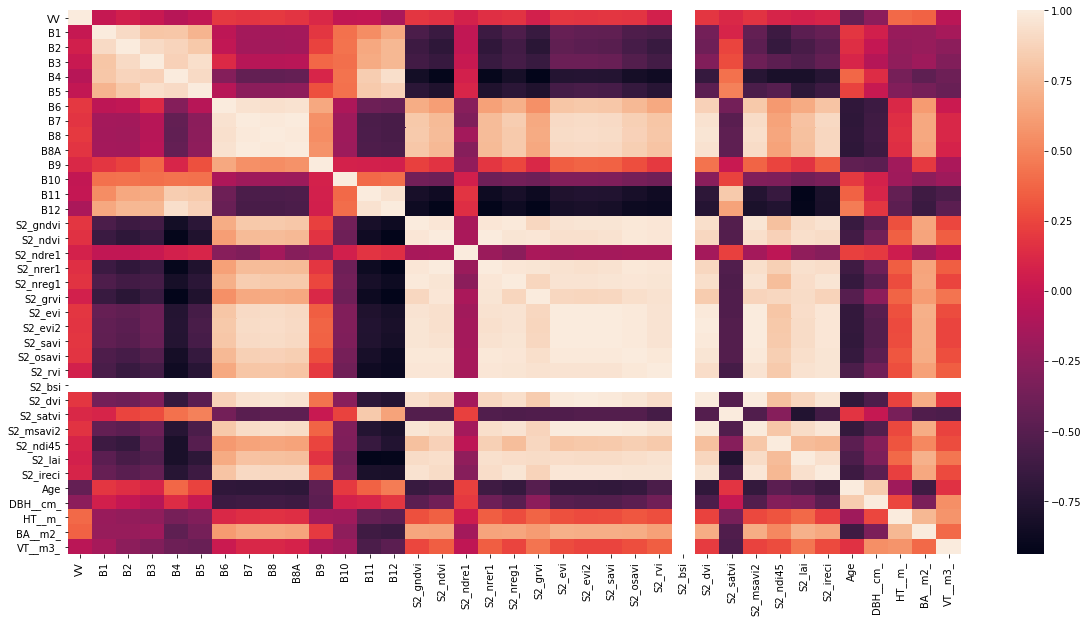

In [106]:
# seed random number generator
#seed(15)
# prepare data
# calculate spearman's correlation
cormat = plots_pd.drop(['angle','QA10','QA20','QA60'], axis = 1).corr()
#print(round(cormat,2))
import seaborn as sns
sns.heatmap(cormat);
for i in range(0,40):
    corr, _ = spearmanr(dsr[:,i], dsr[:,40])
    print(b_f[i],'correlation: %.3f' % corr)

In [109]:
dsr1 = dsr[dsr[:,40] <80, :]
plots_pd1 = plots_pd[plots_pd['VT__m3_'] < 80]

for i in range(0,40):
    corr, _ = spearmanr(dsr1[:,i], dsr1[:,40])
    print(b_f[i],'correlation: %.3f' % corr)
    

VV correlation: 0.075
angle correlation: 0.422
B1 correlation: -0.411
B2 correlation: -0.385
B3 correlation: -0.292
B4 correlation: -0.533
B5 correlation: -0.454
B6 correlation: 0.356
B7 correlation: 0.459
B8 correlation: 0.439
B8A correlation: 0.429
B9 correlation: 0.183
B10 correlation: -0.223
B11 correlation: -0.599
B12 correlation: -0.583
QA10 correlation: nan
QA20 correlation: nan
QA60 correlation: nan
S2_gndvi correlation: 0.473
S2_ndvi correlation: 0.522
S2_ndre1 correlation: -0.156
S2_nrer1 correlation: 0.521
S2_nreg1 correlation: 0.479
S2_grvi correlation: 0.555
S2_evi correlation: 0.512
S2_evi2 correlation: 0.481
S2_savi correlation: 0.484
S2_osavi correlation: 0.503
S2_rvi correlation: 0.520
S2_bsi correlation: nan
S2_dvi correlation: 0.470
S2_satvi correlation: -0.597
S2_msavi2 correlation: 0.478
S2_ndi45 correlation: 0.387
S2_lai correlation: 0.581
S2_ireci correlation: 0.515
Age correlation: -0.120
DBH__cm_ correlation: 0.249
HT__m_ correlation: 0.524
BA__m2_ correlation:

C:\Users\mcalderonloor\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\mcalderonloor\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\mcalderonloor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\mcalderonloor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\mcalderonloor\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


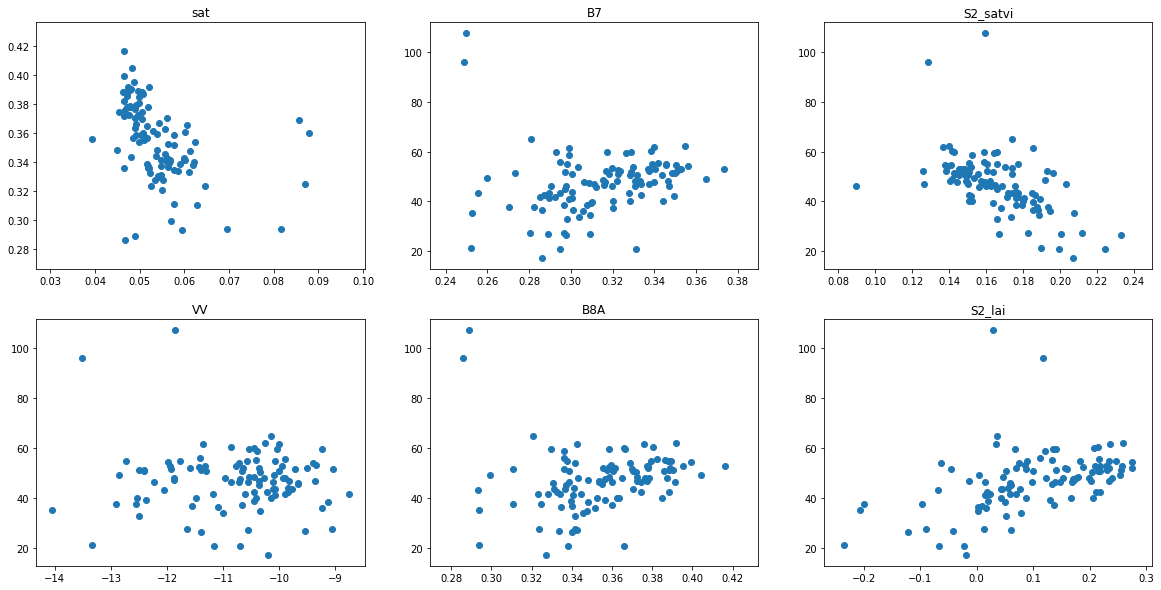

In [112]:
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2, 3, 1)
plt.scatter(plots_pd['B4'],plots_pd['B8A'])
plt.title("sat")

plt.subplot(2,3, 2)
plt.scatter(plots_pd['B7'],plots_pd['VT__m3_'])
plt.title("B7")

plt.subplot(2,3, 3)
plt.scatter(plots_pd['S2_satvi'],plots_pd['VT__m3_'])
plt.title("S2_satvi")

plt.subplot(2,3, 4)
plt.scatter(plots_pd['VV'],plots_pd['VT__m3_'])
plt.title("VV")

plt.subplot(2,3, 5)
plt.scatter(plots_pd['B8A'],plots_pd['VT__m3_'])
plt.title("B8A")

plt.subplot(2,3, 6)
plt.scatter(plots_pd['S2_lai'],plots_pd['VT__m3_'])
plt.title("S2_lai")

plt.show()

#((b11-RED) / (b11+RED+0.5))* 1.5 - (b12/2)


In [51]:
plots_pd1 = plot_pd[plots_pd['VT__m3_'] < 80]

labels = np.array(plots_pd['VT__m3_'])

# Remove the labels from the features
# axis 1 refers to the columns
features= plots_pd.drop(['angle','Age','DBH__cm_','HT__m_','BA__m2_','QA10','QA20','QA60','VT__m3_','B9','B11'], axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)

# Convert to numpy array
features = np.array(features)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2,
                                                                            random_state = 55)

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 250, random_state=55)

# Train the model on training data
rf.fit(train_features, train_labels)

y_pred = rf.predict(test_features)


In [111]:
#X_train, X_test, y_train, y_test =
print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, y_pred)))

rrmse = np.sqrt(metrics.mean_squared_error(test_labels, y_pred))
def nrmse(predictions, targets):
    rrmse = np.sqrt(((predictions - targets) ** 2).mean())
    return rrmse/np.mean(targets)

rrmse1 = nrmse(y_pred,test_labels)
print('Normalized Root Mean Squared Error:', rrmse1)

Mean Absolute Error: 6.067058503401361
Mean Squared Error: 70.9778800401167
Root Mean Squared Error: 8.424837092793943
Normalized Root Mean Squared Error: 0.19902981027389735


In [53]:
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:30} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: S2_satvi                       Importance: 0.17
Variable: B7                             Importance: 0.13
Variable: B8A                            Importance: 0.11
Variable: B6                             Importance: 0.1
Variable: B8                             Importance: 0.06
Variable: S2_grvi                        Importance: 0.05
Variable: B1                             Importance: 0.04
Variable: VV                             Importance: 0.03
Variable: B4                             Importance: 0.03
Variable: B5                             Importance: 0.03
Variable: S2_ndre1                       Importance: 0.03
Variable: S2_lai                         Importance: 0.03
Variable: B2                             Importance: 0.02
Variable: B3                             Importance: 0.02
Variable: B10                            Importance: 0.02
Variable: B12                            Importance: 0.02
Variable: S2_gndvi                       Importance: 0.02
Variable: S2_nr

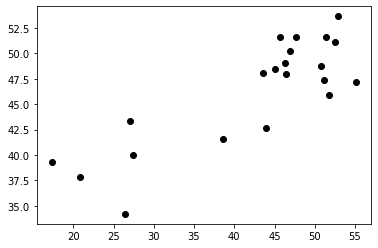

In [54]:
plt.plot(test_labels, y_pred, 'o', color='black');

In [59]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rfa = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rfa, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(train_features, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [83]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    #accuracy = 100 - mape
    rrmse = np.sqrt(metrics.mean_squared_error(test_labels, predictions))
    nrmse = rrmse / np.mean(test_labels)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    #print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('RMSE: ', rrmse)
    print('NRMSE: ', nrmse)    
    return RandomForestRegressor(n_estimators = 10, random_state = 42)

rf.fit(train_features, train_labels)
base_accuracy = evaluate(rf, test_features, test_labels)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)


Model Performance
Average Error: 6.0671 degrees.
RMSE:  8.424837092793943
NRMSE:  0.19902981027389735
Model Performance
Average Error: 6.3298 degrees.
RMSE:  9.076746107791369
NRMSE:  0.21443062172481073


In [78]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [79]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 7, 9, 10, 11, 12],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 3, 4, 5, 10],
    'min_samples_split': [1, 2, 3, 5],
    'n_estimators': [150, 200, 350, 300]
}# Create a based model
rfb = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rfb, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [80]:
grid_search.fit(train_features, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   41.8s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  8.1min finished


{'bootstrap': True,
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 300}

In [81]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)

Model Performance
Average Error: 6.2846 degrees.
Accuracy = 76.68%.
RMSE:  9.17182324068951
NRMSE:  0.21667674037537657
